<h1 style='text-align:center'>Decision Tree Classifier</h1>  
    
Playing with decision tree classifiers.  
1. Classification on 2D generated data set
2. Classification on sklearn "Digits" data set

### Imports

In [1]:
# Importing usefull packages and modules
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from sklearn import tree, datasets
from sklearn.model_selection import (learning_curve, 
                                     ShuffleSplit, GridSearchCV, train_test_split)
from tree_source import (rand_checkers, plot_2d, frontiere)

### Settings

In [2]:
# Plot
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
# Seaborn
sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()
# Seed initialization
np.random.seed(seed=10)

## 1. Observations on 2D generated data set

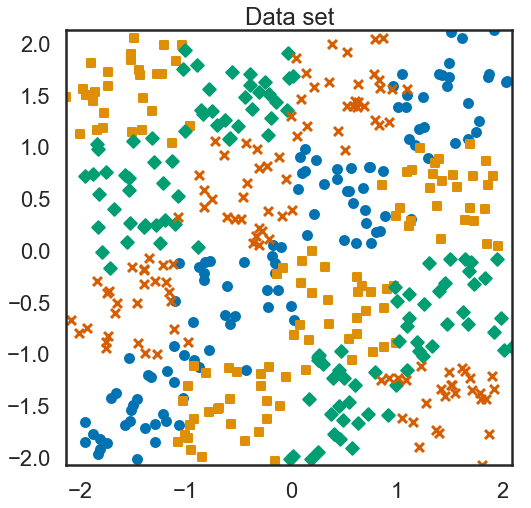

In [3]:
sigma = 0.1
data = rand_checkers(114, 114, 114, 114, sigma)
n_samples = len(data)
X = data[0]
y = data[1]

plt.figure(figsize=(8, 8))
plot_2d(X, y)
plt.title('Data set')
plt.show()

### Decision trees i'm about to use, specified by their classification criterion: Gini index or entropy

In [4]:
# Using DecisionTreeClassifier from sklearn.tree
DTC_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)
DTC_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=None)

### Fit with default parameters classifiers

In [5]:
# Fit both classifiers
DTC_gini.fit(X, y)
DTC_entropy.fit(X, y)
# Print their outputs
print("gini")
print(DTC_gini.get_params())
print(DTC_gini.score(X, y))
print("entropy")
print(DTC_entropy.get_params())
print(DTC_entropy.score(X, y))

gini
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
1.0
entropy
{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
1.0


### Showing the score on the training data as a function of max_depth parameter

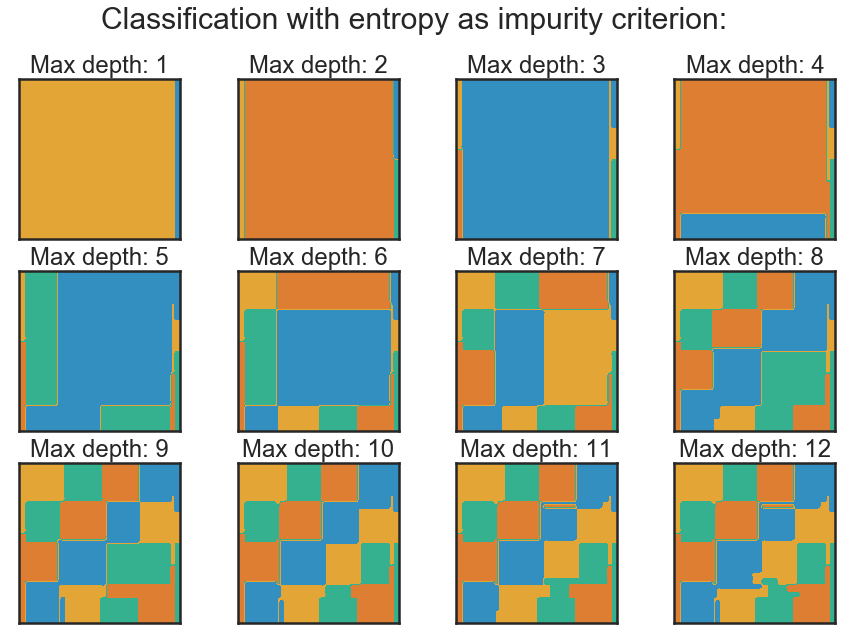

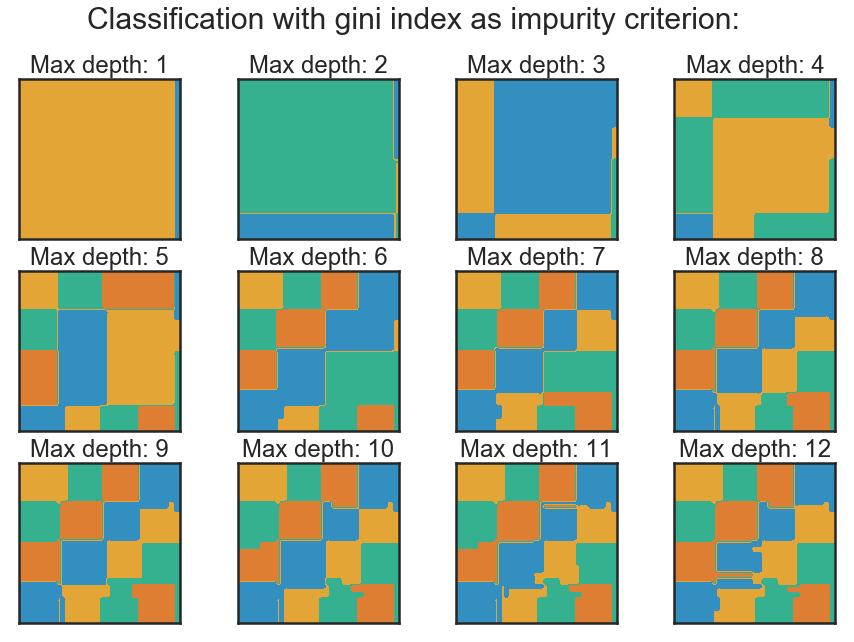

In [6]:
depth_max = 12
scores_entropy = []
scores_gini = []

# Plotting the separation rules using entropy
plt.figure(figsize=(15, 10))
plt.suptitle("Classification with entropy as impurity criterion:", fontsize=30)
for i in range(depth_max):
    DTC_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i + 1)
    DTC_entropy.fit(X, y)
    scores_entropy.append(DTC_entropy.score(X, y))
    plt.subplot(3, 4, i + 1).set_title("Max depth: {}".format(i + 1))
    frontiere(DTC_entropy.predict, X, y, step=50, samples=False, colorbar=False)
plt.show()

print("\n")

# Plotting the separation rules using gini index
plt.figure(figsize=(15, 10))
plt.suptitle("Classification with gini index as impurity criterion:", fontsize=30)
for i in range(depth_max):
    DTC_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i + 1)
    DTC_gini.fit(X, y)
    scores_gini.append(DTC_gini.score(X, y))
    plt.subplot(3, 4, i + 1).set_title("Max depth: {}".format(i + 1))
    frontiere(DTC_gini.predict, X, y, step=50, samples=False, colorbar=False)
plt.show()

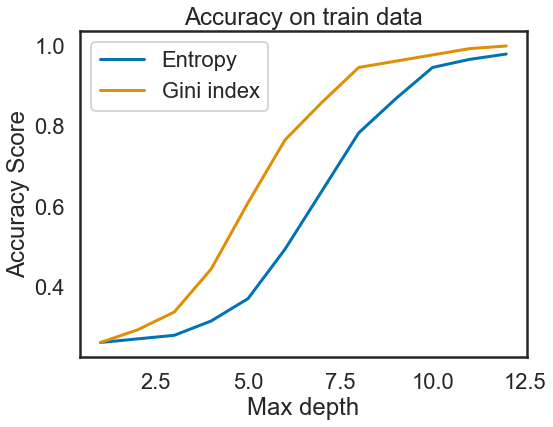

In [7]:
# Plot results
plt.figure()
plt.plot(np.arange(1, depth_max + 1), scores_entropy, label='Entropy')
plt.plot(np.arange(1, depth_max + 1), scores_gini, label='Gini index')
plt.title('Accuracy on train data')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()

### Best performance on training data

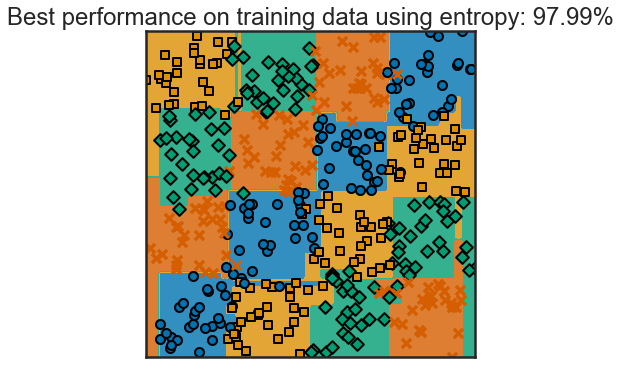

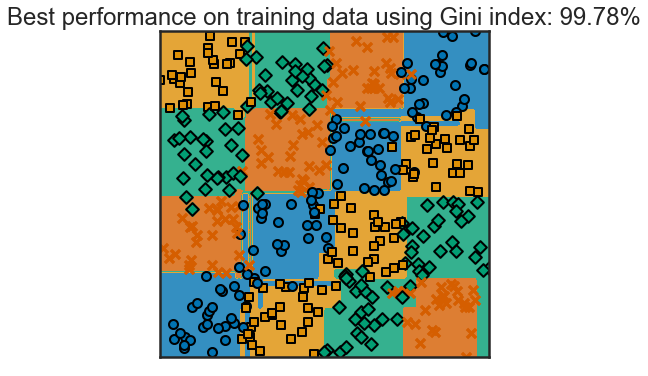

In [8]:
# For the entropy
DTC_entropy.max_depth = np.argmax(scores_entropy) + 1
DTC_entropy.fit(X, y)

plt.figure()
plt.title('Best performance on training data using entropy: {:.2%}'.format(DTC_entropy.score(X, y)))
plot_2d(X, y)
frontiere(DTC_entropy.predict, X, y, step=100, colorbar=False)
plt.show()

# For the Gini index
DTC_gini.max_depth = np.argmax(scores_gini) + 1
DTC_gini.fit(X, y)

plt.figure()
plt.title('Best performance on training data using Gini index: {:.2%}'.format(DTC_gini.score(X, y)))
plot_2d(X, y)
frontiere(DTC_gini.predict, X, y, step=100, colorbar=False)
plt.show()

### Test on new data using the same distribution

In [9]:
# Test data set generation
data_test = rand_checkers(40, 40, 40, 40, sigma)
X_test = data_test[0]
y_test = data_test[1]

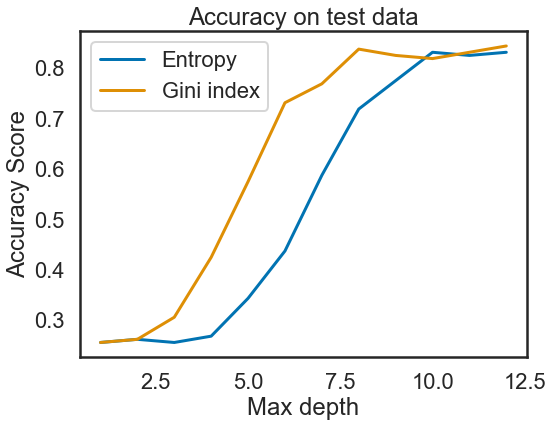

In [10]:
depth_max = 12
scores_entropy = []
scores_gini = []

for i in range(depth_max):
    # Entropy
    DTC_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i + 1)
    DTC_entropy.fit(X, y)
    scores_entropy.append(DTC_entropy.score(X_test, y_test))
    # Gini index
    DTC_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i + 1)
    DTC_gini.fit(X, y)
    scores_gini.append(DTC_gini.score(X_test, y_test))
    
# Plot results
plt.figure()
plt.plot(np.arange(1, depth_max + 1), scores_entropy, label='Entropy')
plt.plot(np.arange(1, depth_max + 1), scores_gini, label='Gini index')
plt.title('Accuracy on test data')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()

### Other method: using GreadSearchCV on train data

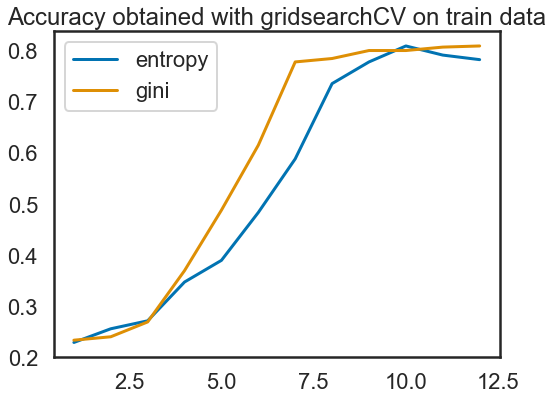

In [11]:
# Depth values to test
Depth_values = np.arange(1, 13)
parameters={'max_depth': Depth_values}


DTC_gini = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini'), parameters, cv=5, iid=True)
DTC_gini.fit(X,y)

DTC_entropy = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), parameters, cv=5, iid=True)
DTC_entropy.fit(X,y)

plt.figure()
plt.title('Accuracy obtained with gridsearchCV on train data')
plt.plot(Depth_values, DTC_entropy.cv_results_['mean_test_score'], label='entropy')
plt.plot(Depth_values, DTC_gini.cv_results_['mean_test_score'], label='gini')
plt.legend()
plt.show()

In [12]:
deth_opt_entropy = DTC_entropy.best_params_['max_depth']
print('Best max depth parameter for entropy: {}'.format(deth_opt_entropy))
deth_opt_gini = DTC_gini.best_params_['max_depth']
print('Best max depth parameter for entropy: {}'.format(deth_opt_gini))

Best max depth parameter for entropy: 10
Best max depth parameter for entropy: 12


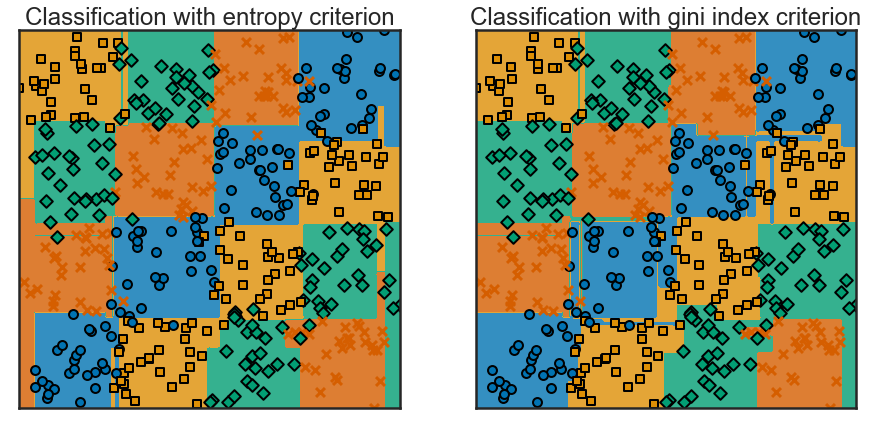

In [13]:
# Plot
plt.figure(figsize=(15,15))
plt.subplot(121)
frontiere(DTC_entropy.predict, X, y, colorbar=False, step=150)
plt.title('Classification with entropy criterion')
plt.subplot(122)
frontiere(DTC_gini.predict, X, y, colorbar=False, step=150)
plt.title('Classification with gini index criterion')
plt.show()

## 2. Classifying Digit data set
  
Applying a decision tree classification method on sklearn digit data set.  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

### Load data set and train/test split

In [14]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

print('Training data contains {} observations.'.format(X_train.shape[0]))
print('Test data contains {} observations.'.format(X_test.shape[0]))

Training data contains 1437 observations.
Test data contains 360 observations.


### Classifier on train data and test data for different max depth parameters

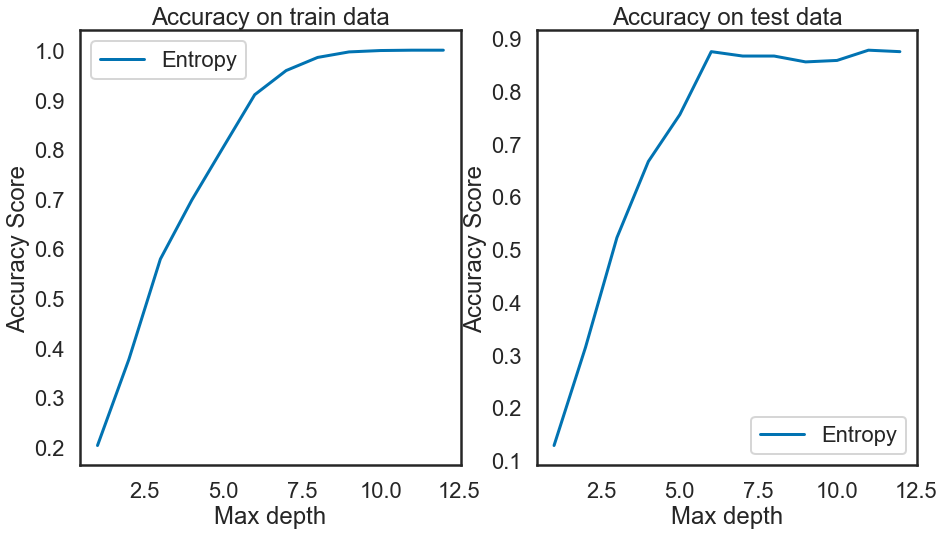

In [15]:
depth_max = 12
scores_entropy_train = np.zeros(depth_max)
scores_entropy_test = np.zeros(depth_max)

# Construct separation rules using entropy
for i in range(depth_max):
    DTC_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i + 1)
    DTC_entropy.fit(X_train, y_train)
    scores_entropy_train[i] = DTC_entropy.score(X_train, y_train)
    scores_entropy_test[i] = DTC_entropy.score(X_test, y_test)
    
print(" ")

# Plot results
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(np.arange(1, depth_max + 1), scores_entropy_train, label='Entropy')
plt.title('Accuracy on train data')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.subplot(122)
plt.plot(np.arange(1, depth_max + 1), scores_entropy_test, label='Entropy')
plt.title('Accuracy on test data')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [16]:
DTC_entropy.max_depth = np.argmax(scores_entropy_train) + 1
DTC_entropy.fit(X_train, y_train)
print('Best tree depth: {}'.format(DTC_entropy.max_depth))
print('Best performance on training data using entropy: {:.2%}'.format(DTC_entropy.score(X_train, y_train)))
print('\n')
print('Performance of the train-best classifier on test data using entropy: {:.2%}'.format(DTC_entropy.score(X_test, y_test)))

Best tree depth: 11
Best performance on training data using entropy: 100.00%


Performance of the train-best classifier on test data using entropy: 87.50%


### Using gridsearchCV

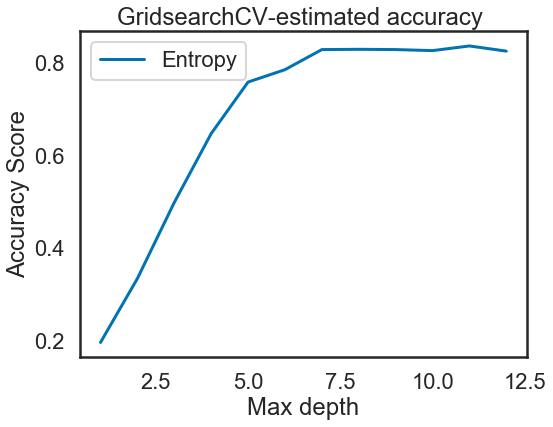

Best CV-chosen tree depth: 11


In [17]:
# Depth values to cover
Depth_values = np.arange(1, 13)
parameters={'max_depth': Depth_values}

# CV with gridsearch CV
DTC_entropy = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), parameters, cv=10, iid=True)
DTC_entropy.fit(digits.data, digits.target)

# Plot
plt.figure()
plt.plot(Depth_values, DTC_entropy.cv_results_['mean_test_score'], label='Entropy')
plt.title('GridsearchCV-estimated accuracy ')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

print('Best CV-chosen tree depth: {}'.format(np.argmax(DTC_entropy.cv_results_['mean_test_score']) + 1))

### Learning curve

### Function found here:  
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [18]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Plot the learning curve for the classification tree

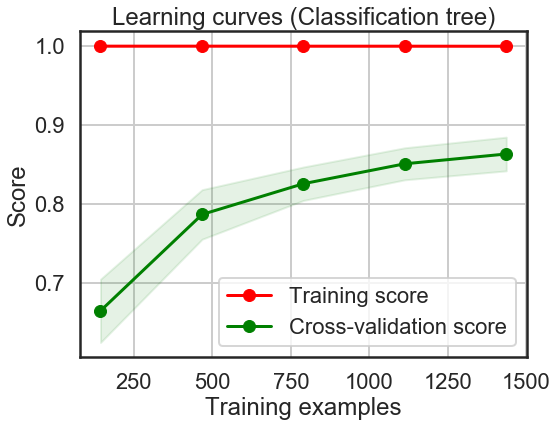

In [19]:
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)
plot_learning_curve(estimator, 'Learning curves (Classification tree)', digits.data, digits.target, cv=cv, n_jobs=4)
plt.show()